<a href="https://colab.research.google.com/github/amith-l/Image_Classification/blob/main/Minor_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Image Classification using Machine learning
#Classification of vegetables(cucumber,beetroot or caroot)

In [ ]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

#reading collected data
Data_path=("/content/drive/MyDrive/python_smartknower/images")
Data_categories=("beetroot","carrot","cucumber") 

In [ ]:
#Image preprocessing
for category in Data_categories:
  index_num=Data_categories.index(category) #label encoding
  path=os.path.join(Data_path,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #image resizing and flattening
    img_resized=resize(img_array,(150,150))
    images.append(img_resized)
    flat_data.append(img_resized.flatten())
    target.append(index_num)

#converting data into numpy array
target=np.array(target)
images=np.array(images)
flat_data=np.array(flat_data)

flat_data[0]

array([0.38818318, 0.6411505 , 0.28198745, ..., 0.42602632, 0.465242  ,
       0.47308514])

<BarContainer object of 3 artists>

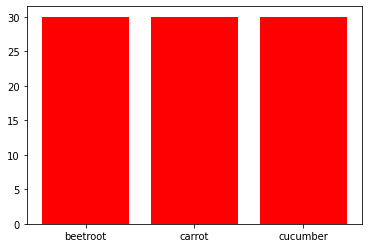

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(Data_categories,count,color='red')

In [ ]:
#data splitting as training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3, random_state=109)

In [ ]:
#svm classifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameter_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
                {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
              
svc=svm.SVC(probability=True) 
clf=GridSearchCV(svc,parameter_grid)           
clf.fit(x_train,y_train)
#len(y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred=clf.predict(x_test)
print(y_test)
y_pred

[1 0 1 2 2 1 0 1 1 0 1 0 1 2 2 1 2 1 0 1 2 2 2 0 0 0 1]


array([2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 2])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[7, 0, 0],
       [0, 6, 0],
       [1, 5, 8]])

In [ ]:
#saving the model
import pickle
pickle.dump(clf,open('img_clsfy_model.p','wb'))

In [ ]:
model=pickle.load(open('img_clsfy_model.p','rb'))

Enter the url of codehttps://th.bing.com/th/id/Rd0fbc43fd71989246dd8542ba0220372?rik=hU%2bcusfnH6iliw&riu=http%3a%2f%2fsuburbantomato.com%2fwp-content%2fuploads%2f2011%2f10%2fbeetroot-017.jpg&ehk=5oQitdLjEaziAFCYGXu8Eq4Jqua%2fk9qBQXVwy%2f7YPno%3d&risl=&pid=ImgRaw
 Predicted Output: beetroot


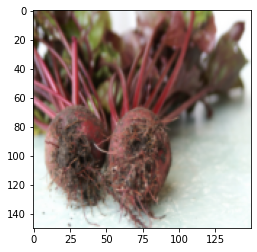

In [ ]:
#testing with new image
flat_data=[]
new_image=input('Enter the url of image')
img=imread(new_image)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=Data_categories[y_out[0]]
print(f' Predicted Output: {y_out}')
